In [222]:
from sklearn.neural_network import MLPClassifier
import numpy as np

f_leftandright = open('leftandright', 'rb')
left_lst = []
right_lst = []
pan_lst = []
tilt_lst = []

for i in range(16139):
  left = f_leftandright.read(4)
  right = f_leftandright.read(4)
  pan = f_leftandright.read(4)
  tilt = f_leftandright.read(4)
  left_lst.append(int.from_bytes(left, byteorder = 'little' ,signed = True))
  right_lst.append(int.from_bytes(right, byteorder = 'little' ,signed = True))
  pan_lst.append(int.from_bytes(pan, byteorder = 'little' ,signed = True))
  tilt_lst.append(int.from_bytes(tilt, byteorder = 'little' ,signed = True))

f_offset = open('offset', 'rb')
panoff_lst = []
tiltoff_lst = []
rotateoff_lst = []
tranoff_lst = []

for i in range(16139):
  panoff = f_offset.read(4)
  tiltoff = f_offset.read(4)
  rotateoff = f_offset.read(4)
  tranoff = f_offset.read(4)
  panoff_lst.append(int.from_bytes(panoff, byteorder = 'little' ,signed = True))
  tiltoff_lst.append(int.from_bytes(tiltoff, byteorder = 'little' ,signed = True))
  rotateoff_lst.append(int.from_bytes(rotateoff, byteorder = 'little' ,signed = True))
  tranoff_lst.append(int.from_bytes(tranoff, byteorder = 'little' ,signed = True))

rotatecom = []
translatecom = []
for i in range(16139):
  rotatecom.append((right_lst[i] - left_lst[i])/2)
  translatecom.append((right_lst[i] + left_lst[i])/2)


In [223]:
size = 15000
test_num = 1000
datanum = 5
purpose_offset = rotateoff_lst
purpose_value = rotatecom

In [224]:
input_lst = []
input_lst_test = []
for i in range(size - datanum + 1):
  box = []
  for j in range(i, i+datanum, 1):
    box.append(purpose_offset[j])
  if i > size - datanum + 1 - test_num - 1:
    input_lst_test.append(box)
  else : 
    input_lst.append(box)

label_lst = []
label_lst_test = []
for i in range(datanum - 1, size, 1):
  if i > size -  test_num - 1:
    label_lst_test.append(purpose_value[i])
  else:
    label_lst.append(purpose_value[i])


In [225]:
print(len(input_lst), len(input_lst_test))
print(len(label_lst), len(label_lst_test))

13996 1000
13996 1000


In [226]:
# rotateoff_numpy = np.array(input_lst)
# rotatecom_numpy = np.array(label_lst)

# mean_vals = np.mean(rotateoff_numpy, axis=0)
# std_val = np.std(rotateoff_numpy)

# mean_vals_com = np.mean(rotatecom_numpy, axis=0)
# std_val_com = np.std(rotatecom_numpy)

# rotateoff_numpy_centered = (rotateoff_numpy - mean_vals)/std_val
# rotatecom_numpy_centered = (rotatecom_numpy - mean_vals_com)/std_val_com

# train_x = np.ones((13139, datanum))
# train_y = np.ones((13139, 1))
# test_x = np.ones((2000 - datanum + 1, datanum))
# test_y = np.ones((2000 - datanum + 1, 1))

# for i in range(13139):
#   train_x[i] = rotateoff_numpy_centered[i]
#   train_y[i] = rotatecom_numpy_centered[i]

# for i in range(13139, 15139 - datanum + 1, 1):
#   test_x[i - 13139] = rotateoff_numpy_centered[i]
#   test_y[i - 13139] = rotatecom_numpy_centered[i]

# train_x = train_x.tolist()
# train_y = train_y.tolist()
# test_x = test_x.tolist()
# test_y = test_y.tolist()  

In [227]:

# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = MLPClassifier(solver='adam', alpha=1e-5,batch_size=100,
                     hidden_layer_sizes=(10, 10), random_state=1)




In [228]:
clf.fit(input_lst, label_lst)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [229]:
clf.predict(input_lst_test)


array([-109., -141., -141., -141., -141.,  -88.,  -88.,  -91.,  -72.,
        -65.,  -69.,  120.,  128.,  128.,  131.,  131.,  131.,  133.,
        145.,  145.,  148.,  138.,  131.,  131.,  121.,  114.,  111.,
        111.,  107.,  107.,  107.,  102.,  109.,  107.,  112.,  112.,
        112.,  124.,  124.,  122.,  128.,  124.,  124.,  128.,  124.,
        129.,  124.,  124.,  124.,  122.,  114.,  107.,  111.,  107.,
        102.,  102.,  102.,   99.,   99.,   99.,   99.,  102.,  102.,
        102.,  102.,   99.,   99.,  102.,   99.,   99.,   99.,   99.,
         99.,   99.,   95.,   87.,   95.,   95.,   95.,  -87.,   95.,
         95.,   95.,   95.,   95.,   95.,   95.,   95.,   95.,   95.,
         95.,   95.,   95.,   95.,   95.,   95.,   95.,   95.,   73.,
         73.,   73.,   73.,   73.,   73.,   73.,   73.,   73.,   73.,
         73.,   73.,   73.,   73.,  -95.,  -93.,  -88.,  -69.,  -69.,
        120.,  128.,  128.,  131.,  143.,  153.,  153.,  153.,  153.,
        160.,  160.,

In [230]:
label_lst[0]

-22.0

In [231]:
[coef.shape for coef in clf.coefs_]

[(5, 10), (10, 10), (10, 451)]

R_square : 0.6004350612679298


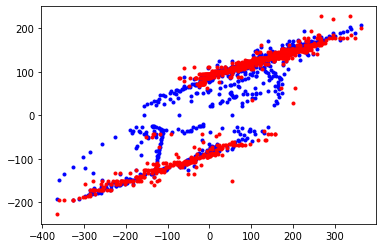

In [232]:
import matplotlib.pyplot as plt

y_hat = clf.predict(input_lst_test)


SSE_lst = 0 
SST_lst = 0

sume = 0
for i in range(len(label_lst_test)):
  sume = sume + label_lst_test[i]

means = float(sume/len(label_lst_test))

for i in range(len(input_lst_test)):
  SSE_lst += (label_lst_test[i] - y_hat[i])**2
  SST_lst += (label_lst_test[i] - means)**2



R_square = 1 - (SSE_lst / SST_lst)

print("R_square :", R_square) 

input_encoded = []
for i in range(len(input_lst_test)):
  input_encoded.append(input_lst_test[i][datanum -1])

plt.plot(input_encoded, label_lst_test, '.', color = 'b') 
plt.plot(input_encoded, y_hat, '.', color = 'r') 

plt.show()

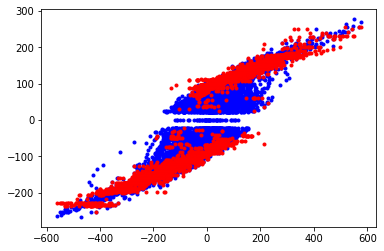

In [233]:
input_encoded = []
for i in range(len(input_lst)):
  input_encoded.append(input_lst[i][datanum -1])
y_hat_2 = clf.predict(input_lst)

plt.plot(input_encoded, label_lst, '.', color = 'b')
plt.plot(input_encoded, y_hat_2, '.', color = 'r')
plt.show()